<img src="", width=150, ALIGN="left", border=20>
<center>
<h1>Air Quality Challenge Starting Kit</h1>
<br>This code was tested with <br>
Python 2.7.13 | Anaconda 4.3.1 (https://anaconda.org/)<br>
<a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science (CDS)</a>
</center>

ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 

# Introduction

The Air Quality challenge is a regression problem inspired from the Kaggle challenge <a href="https://www.kaggle.com/nelsonchu/air-quality-in-northern-taiwan">Air Quality in Northern Taiwan</a>, formatted in the AutoML format. 


In [64]:
model_dir = 'sample_code_submission/'          
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns; sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h1> Step 1: Exploratory data analysis </h1>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.

In [65]:
datadir = 'sample_data'              # Change this to the directory where you put the input data
dataname = 'air'
!ls $datadir*

air_feat.name      air_test.data      air_train.solution
air_label.name     air_test.solution  air_valid.data
air_public.info    air_train.data     air_valid.solution


For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data. YOU MIGHT WANT TO KEEP THIS UNTIL THE NEXT YELLOW BLOCK.

In [66]:
from data_io import read_as_df
data = read_as_df(datadir  + '/' + dataname)                # The data are loaded as a Pandas Data Frame
target_name = data.columns.values[-1]                       # The last column is the target

Reading sample_data/air_train from AutoML format
Number of examples = 71686
Number of features = 14
Number of labels = 1


In [67]:
data.head()

AMB_TEMP  CH4  CO  NMHC  O3  PM10  RH  SO2  THC  UVB  WD_HR  WIND_DIREC  \
0        14    1   0     0  29    16  78    1    2    1     92          88   
1        27    1   0     0  25    24  85    4    1    1     98         124   
2        30    1   0     0  18    17  69    8    2    1    114         115   
3        21    2   0     0  20    41  89    1    2    1    151         190   
4        32    1   0     0  64    51  56    6    2    8    188         143   

   WIND_SPEED  WS_HR  NOx  
0           3      2    9  
1           1      0   12  
2           5      5    8  
3           1      1   17  
4           1      0   25

In [68]:
data.describe() 

AMB_TEMP           CH4            CO          NMHC            O3  \
count  71686.000000  71686.000000  71686.000000  71686.000000  71686.000000   
mean      23.295260      1.170759      0.151034      0.007882     28.949460   
std        5.672731      0.389883      0.507841      0.091985     17.277159   
min       -9.000000      0.000000      0.000000     -1.000000     -8.000000   
25%       19.000000      1.000000      0.000000      0.000000     16.000000   
50%       23.000000      1.000000      0.000000      0.000000     29.000000   
75%       27.000000      1.000000      0.000000      0.000000     40.000000   
max       56.000000     15.000000     36.000000      3.000000    144.000000   

               PM10            RH           SO2           THC           UVB  \
count  71686.000000  71686.000000  71686.000000  71686.000000  71686.000000   
mean      45.124864     75.734048      2.998940      1.924825      1.016949   
std      156.558857     13.292049      5.634359      0.346846      0.764074   
min     -396.000000      0.000000     -7.000000      0.000000      0.000000   
25%       26.000000     68.000000      1.000000      2.000000      1.000000   
50%       37.000000     76.000000      2.000000      2.000000      1.000000   
75%       52.000000     85.000000      4.000000      2.000000      1.000000   
max     9999.000000    100.000000    311.000000     14.000000     12.000000   

              WD_HR    WIND_DIREC    WIND_SPEED         WS_HR           NOx  
count  71686.000000  71686.000000  71686.000000  71686.000000  71686.000000  
mean     145.459811    145.629997      1.963159      1.449000     26.664035  
std       79.465573     80.426305      1.618284      1.600625     26.629395  
min        0.000000      0.000000      0.000000      0.000000     -4.000000  
25%       83.000000     82.000000      1.000000      0.000000     10.000000  
50%      145.000000    145.000000      2.000000      1.000000     19.000000  
75%      198.000000    199.000000      2.000000      2.000000     33.000000  
max      360.000000    360.000000     50.000000     50.000000    411.000000

In [69]:
data.hist(figsize=(10, 10), bins=50, layout=(3, 5));

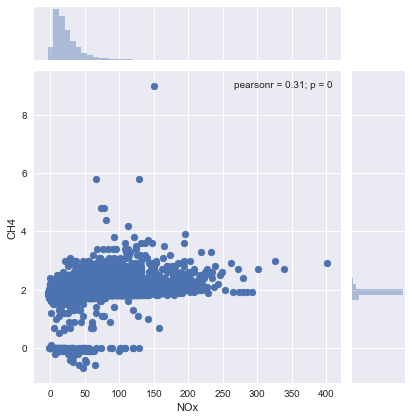

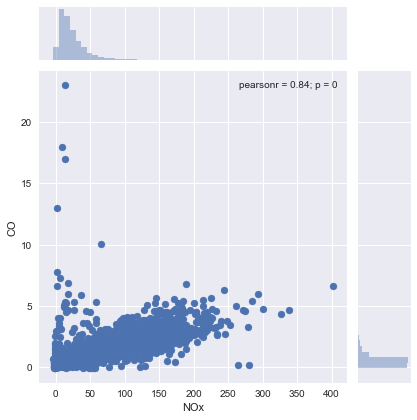

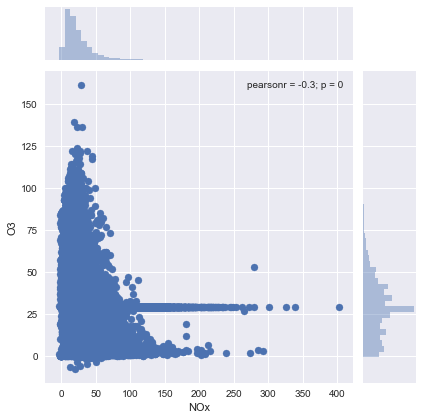

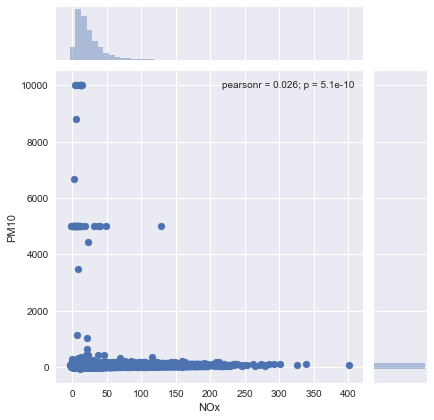

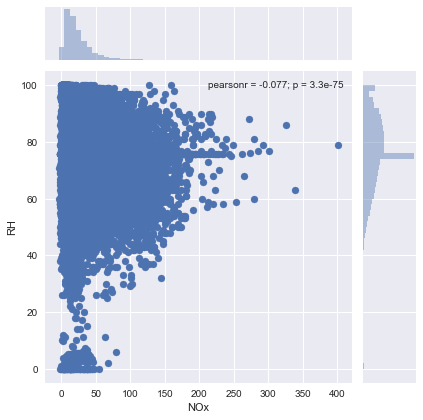

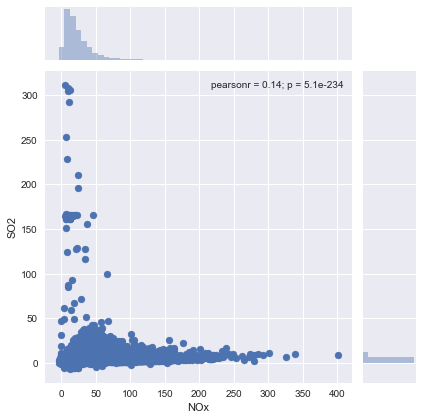

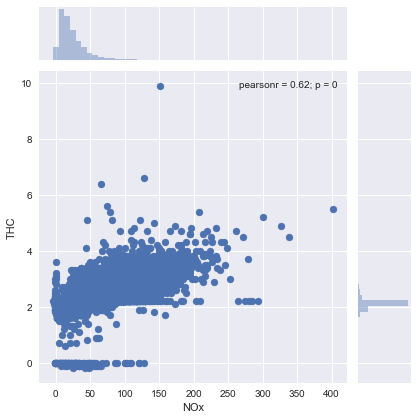

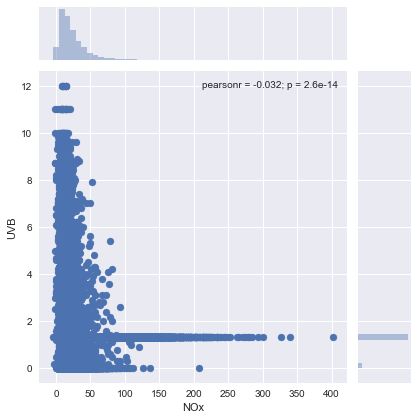

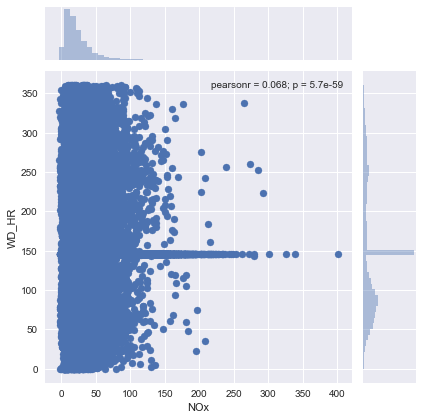

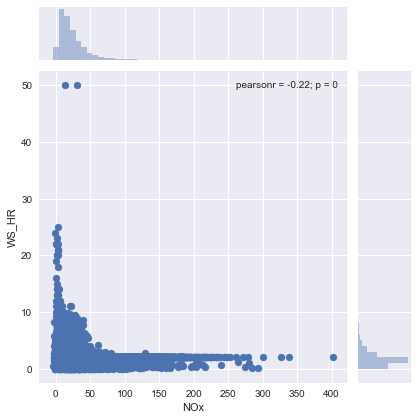

In [37]:
for i in range(len(data.columns.values)-1):
    sns.jointplot(x="NOx", y=data.columns.values[i], data=data)

# Step 2: Building a predictive model


## Loading data with DataManager
We reload the data with the AutoML DataManager class because this is more convenient:

In [70]:
from data_manager import DataManager
D = DataManager(dataname, datadir, replace_missing=True)
print D

Info file found : /Users/clementgarcin/Documents/MINI_PROJECT_ECOLO_TEAM/starting-kit/sample_data/air_public.info
-------------------- file_to_libsvm  ---------------------
-------------------- file_to_libsvm  ---------------------
-------------------- file_to_libsvm  ---------------------
DataManager : air
info:
	task = regression
	name = air
	feat_type = Numerical
	format = sparse_binary
	is_sparse = 0.
	metric = r2_metric
	target_type = Numerical
	test_num = 71685
	label_num = NA
	target_num = 1
	valid_num = 73858
	has_categorical = 0
	usage = Air Quality
	feat_num = 14
	time_budget = 499
	train_num = 71685
	has_missing = 0
data:
	X_train = array(71686, 14)
	Y_train = array(71686,)
	X_valid = array(73858, 14)
	X_test = array(71685, 14)
feat_type:	array(14,)
feat_idx:	array(0,)



## Training a predictive model
We provide an example of predictive model (regression) in the `sample_code_submission/` directory. It's a simple decision tree regressor. Find a better model and replace it.

In [89]:
from model import model
??model 

<h3>Create or reload model</h3>
Create an instance of the model (run the constructor) and attempt to reload a previously saved model from `sample_code_submission/*_model.pickle` if `reload_model=1`.<br>
If you saved have an aldeady trained model saved in sample_code_submission, the evaluation script will reload it and not retrain, just test. This will happen the second time you run the code because when the model is trained it gets saved. <br>
When you reload a model, you risk to reload a model trained on the wrong data. Delete `*_model.pickle` from `sample_code_submission/` if you do not want this to happen.

In [90]:
M = model()   
reload_model=0                       # Change to 1 to reload an already trained model

trained_model_name = model_dir + dataname
if reload_model:    
    M = M.load(trained_model_name)                  # Attempts to re-load an already trained model

<h3> Training:</h3>

In [91]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']

if not(M.is_trained):                               # No need to train if model already trained
    M.fit(X_train, Y_train)  

### Making predictions:

In [92]:
Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

### Saving:
Save the trained model (will be ready to reload next time around) and save the prediction results:

In [94]:
M.save(trained_model_name)                 
result_name = 'sample_result_submission/' + dataname
from data_io import write
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

sample_result_submission/air_test.predict
sample_result_submission/air_valid.predict


## Scoring the results
### Load the challenge metric
<b>The metric chosen for your challenge</b> is identified in the "metric.txt" file found in the `scoring_function/` directory. We use here the `r2_metric` metric (an example of organizer-supplied metric found in `my_metric.py`), which computes the coefficient of determination. 

In [95]:
with open(score_dir + '/metric.txt', 'r') as f:
    metric_name = f.readline().strip()
import libscores, my_metric
try:
    scoring_function = getattr(libscores, metric_name)
except:
    scoring_function = getattr(my_metric, metric_name)
print 'Using scoring metric:', metric_name
??scoring_function

Using scoring metric: r2_regression


### Training performance
The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions. 

In [96]:
Y_train =  Y_train.ravel() # We need this conversion to a line vector

In [97]:
print 'Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train)
print 'Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train)

Training score for the r2_regression metric = 0.7635
Ideal score for the r2_regression metric = 1.0000


In [102]:
from sklearn.model_selection import KFold
from numpy import zeros, mean
# 5-fold cross-validation
n = 5
kf = KFold(n_splits=n)
kf.get_n_splits(X_train)
i=0
scores = zeros(n)
for train_index, test_index in kf.split(X_train):
    Xtr, Xva = X_train[train_index], X_train[test_index]
    Ytr, Yva = Y_train[train_index], Y_train[test_index]
    M = model()
    M.fit(Xtr, Ytr)
    Yhat = M.predict(Xva)
    scores[i] = scoring_function(Yva, Yhat)
    print ('Fold', i+1, 'example metric = ', scores[i])
    i=i+1
print ('Average score = ', mean(scores))

('Fold', 1, 'example metric = ', 0.76294271609363806)
('Fold', 2, 'example metric = ', 0.75938520116755226)
('Fold', 3, 'example metric = ', 0.76745508652720473)
('Fold', 4, 'example metric = ', 0.75230325243762752)
('Fold', 5, 'example metric = ', 0.76252386596294108)
('Average score = ', 0.76092202443779278)


# Step 3: Making a submission

## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 

In [100]:
outdir = 'sample_result_submission'     

In [101]:
!python $problem_dir/ingestion.py $datadir $outdir $problem_dir $model_dir

Using input_dir: /Users/clementgarcin/Documents/MINI_PROJECT_ECOLO_TEAM/starting-kit/sample_data
Using output_dir: /Users/clementgarcin/Documents/MINI_PROJECT_ECOLO_TEAM/starting-kit/sample_result_submission
Using program_dir: /Users/clementgarcin/Documents/MINI_PROJECT_ECOLO_TEAM/starting-kit/ingestion_program
Using submission_dir: /Users/clementgarcin/Documents/MINI_PROJECT_ECOLO_TEAM/starting-kit/sample_code_submission

========== Ingestion program version 6 ==========

************************************************
******** Processing dataset Air ********
************************************************
========= Reading and converting data ==========
Info file found : /Users/clementgarcin/Documents/MINI_PROJECT_ECOLO_TEAM/starting-kit/sample_data/air_public.info
========= Reading /Users/clementgarcin/Documents/MINI_PROJECT_ECOLO_TEAM/starting-kit/sample_data/air_feat.type
[+] Success in  0.00 sec
========= Reading /Users/clementgarcin/Documents/MINI_PROJECT_ECOLO_TEAM/starting-k

## Preparing the submission

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.